# Pump it Up Well Prediction: Modeling

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.optimizers import Adam

from sklearn import set_config
set_config(transform_output='pandas')

from tensorflow.keras.backend import clear_session
from tensorflow.random import set_seed
clear_session()
np.random.seed(42)
set_seed(42)

import joblib

In [68]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    # For each metric
    for i, metric_name in enumerate(metrics):
    
        # Get the axis for the current metric
        if len(axes) > 1:
            ax = axes[i]
        else:
            ax = axes
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

def evaluate_classification(model, X_train, y_train, X_test, y_test, name='class_model', **args):
    train_pred = np.round(model.predict(X_train))
    test_pred = np.round(model.predict(X_test))

    print('Training Metrics')
    print('---' * 10)
    print(classification_report(y_train, train_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, train_pred, cmap='Greens', **args)
    plt.show()

    print('Testing Metrics')
    print('---' * 10)
    print(classification_report(y_test, test_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, test_pred, cmap='Blues', **args)
    plt.show()

In [5]:
loaded = joblib.load('engineered_data_and_processor.joblib')

In [6]:
loaded.keys()

dict_keys(['X_train_eng', 'X_test_eng', 'y_test_bin', 'y_train_bin', 'preprocessor'])

In [72]:
X_train = loaded['X_train_eng']
X_test = loaded['X_test_eng']
y_train = loaded['y_train_bin']
y_test = loaded['y_test_bin']
preprocessor = loaded['preprocessor']

class_labels = ['non functional', 'functional']

# Prep data

In [63]:


X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)



,public_meeting_False,public_meeting_True,construction_year_0,construction_year_1960,construction_year_1961,construction_year_1962,construction_year_1963,construction_year_1964,construction_year_1965,construction_year_1966,...,waterpoint_type_improved spring,amount_tsh,population,has_water,longitude^2,latitude^3,latitude^2 longitude,latitude longitude^2,longitude^3,pca1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,850,0,1346.590879,-42.429438,446.405314,-4696.684952,49414.397280,-3.373709
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,15,1,1402.973402,-37.415683,419.012685,-4692.460910,52550.173772,-4.776858
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50,0,1034.794648,-651.920678,2418.560328,-8972.616230,33287.506244,1.545808
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,500,0,945.145870,-39.722147,357.907855,-3224.851687,29056.831927,0.244368
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1045.601316,-105.731817,723.025348,-4944.260590,33810.312256,-0.251606


In [130]:
model_default = Sequential()

model_default.add(Dense(X_train_tf.shape[1], input_dim=X_train_tf.shape[1], activation='relu'))
model_default.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=.00001)

model_default.compile(loss='bce', optimizer=optimizer, metrics=[Accuracy(), Precision(), Recall()])
model_default.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 107)               11556     
                                                                 
 dense_5 (Dense)             (None, 1)                 108       
                                                                 
Total params: 11,664
Trainable params: 11,664
Non-trainable params: 0
_________________________________________________________________


In [131]:
history = model_default.fit(X_train_tf, y_train,
                            validation_data=[X_test_tf, y_test],
                            epochs=200,
                            # callbacks=[EarlyStopping(patience=5)]
                           )

Epoch 1/200
1345/1345 [==============================] - 2s 1ms/step - loss: 107.5172 - accuracy: 0.3469 - precision_2: 0.6288 - recall_2: 0.5148 - val_loss: 18.3168 - val_accuracy: 0.3129 - val_precision_2: 0.6370 - val_recall_2: 0.6277
Epoch 2/200
1345/1345 [==============================] - 2s 1ms/step - loss: 14.2230 - accuracy: 0.3018 - precision_2: 0.6390 - recall_2: 0.6620 - val_loss: 9.1563 - val_accuracy: 0.2592 - val_precision_2: 0.6415 - val_recall_2: 0.7092
Epoch 3/200
1345/1345 [==============================] - 2s 1ms/step - loss: 6.4510 - accuracy: 0.1401 - precision_2: 0.6432 - recall_2: 0.6652 - val_loss: 4.9316 - val_accuracy: 0.0960 - val_precision_2: 0.6570 - val_recall_2: 0.4530
Epoch 4/200
1345/1345 [==============================] - 2s 1ms/step - loss: 4.0158 - accuracy: 0.1016 - precision_2: 0.6432 - recall_2: 0.6642 - val_loss: 3.1234 - val_accuracy: 0.0968 - val_precision_2: 0.6325 - val_recall_2: 0.7602
Epoch 5/200
1345/1345 [==============================] -

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'precision_2'}>,
        <Axes: title={'center': 'recall_2'}>], dtype=object))

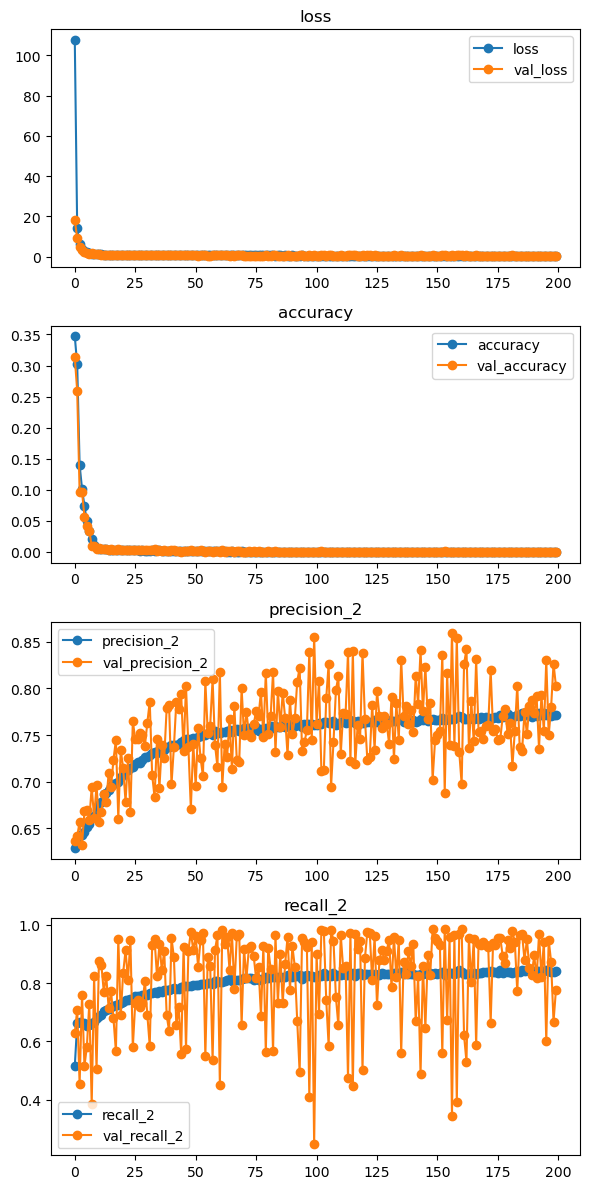

In [132]:
plot_history(history)

449/449 [==============================] - 0s 595us/step
Training Metrics
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     26302
           1       0.73      0.78      0.75     26302

    accuracy                           0.75     52604
   macro avg       0.75      0.75      0.75     52604
weighted avg       0.75      0.75      0.75     52604



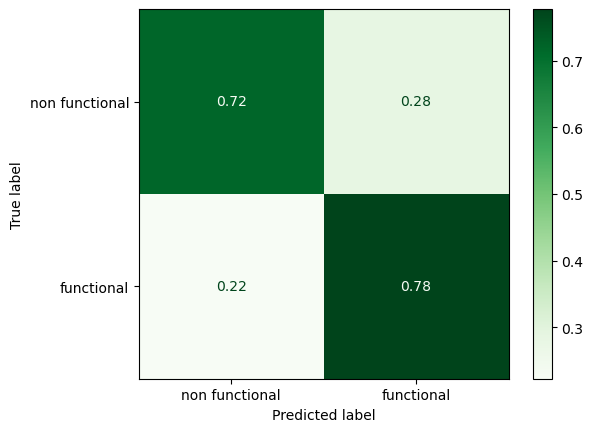

Testing Metrics
------------------------------
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      5534
           1       0.80      0.78      0.79      8804

    accuracy                           0.75     14338
   macro avg       0.73      0.74      0.73     14338
weighted avg       0.75      0.75      0.75     14338



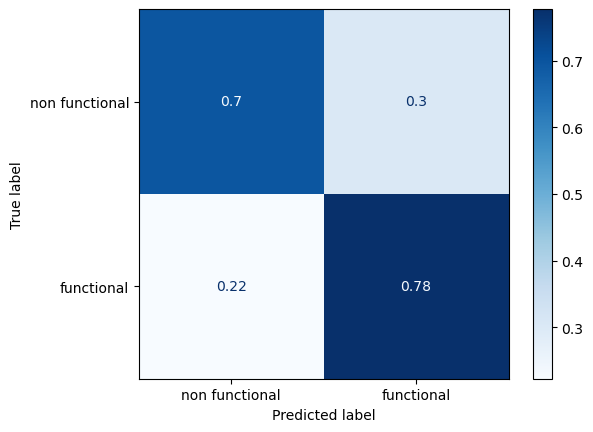

In [133]:
evaluate_classification(model_default, X_train_resampled, y_train_resampled, X_test_tf, y_test, name='default',
                       normalize='true', display_labels=class_labels)

# Tuning

In [134]:
import keras_tuner as kt
from keras_tuner import HyperParameters as hp

import os

folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [135]:
def build_model(hp):
    model = Sequential()
    input_dim = X_train_resampled.shape[1]
    layers = hp.Int('layers', min_value=1, max_value=5, step=2)
    nodes = hp.Int('nodes', min_value=input_dim, max_value=input_dim * 3, step=input_dim)
    dropout_rate = hp.Float('dropout_rate', min_value=0, max_value= .5, step=.1)
    optimizer = hp.Choice('optimizer', ['rmsprop', 'nadam', 'adam'])

    for layer in range(layers):
        model.add(Dense(nodes, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='bce', optimizer=optimizer, metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

    return model

In [136]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=50,
                     directory=folder,
                     overwrite=True,
                     seed=42,
                     project_name='Well_predictor')

tuner.search(X_train_tf, y_train,
             epochs=50,
             validation_data=[X_test_tf, y_test],
             callbacks=[EarlyStopping(patience=5)])

Trial 90 Complete [00h 00m 15s]
val_loss: 0.6570786237716675

Best val_loss So Far: 0.5595656037330627
Total elapsed time: 00h 35m 21s
INFO:tensorflow:Oracle triggered exit


In [137]:
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values

{'layers': 1,
 'nodes': 321,
 'dropout_rate': 0.1,
 'optimizer': 'nadam',
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0068'}

In [138]:
best_model = tuner.get_best_models()[0]
best_model.evaluate(X_test_tf, y_test, return_dict=True)

449/449 [==============================] - 1s 778us/step - loss: 0.5596 - accuracy: 0.7222 - precision: 0.6950 - recall: 0.9757


{'loss': 0.5595656037330627,
 'accuracy': 0.722206711769104,
 'precision': 0.6950400471687317,
 'recall': 0.975692868232727}

449/449 [==============================] - 0s 580us/step
Training Metrics
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.31      0.47     16711
           1       0.69      0.98      0.81     26302

    accuracy                           0.72     43013
   macro avg       0.79      0.65      0.64     43013
weighted avg       0.77      0.72      0.68     43013



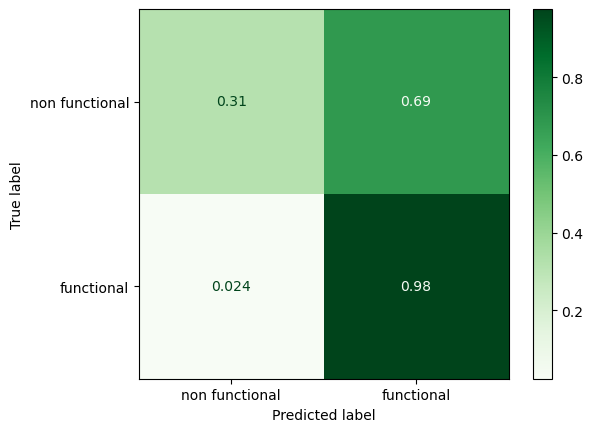

Testing Metrics
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.32      0.47      5534
           1       0.70      0.98      0.81      8804

    accuracy                           0.72     14338
   macro avg       0.79      0.65      0.64     14338
weighted avg       0.77      0.72      0.68     14338



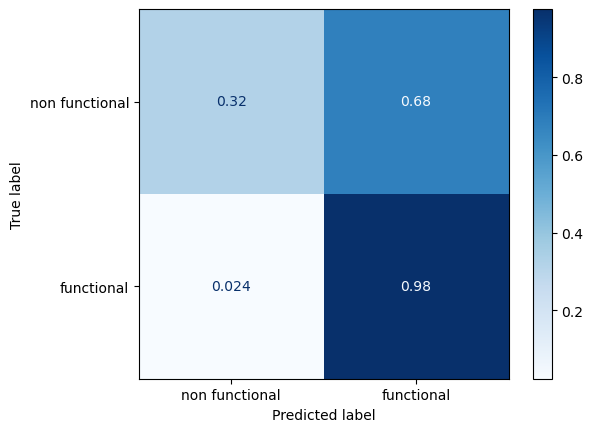

In [140]:
evaluate_classification(best_model, X_train_tf, y_train, X_test_tf, y_test, name='tuned model', display_labels=class_labels,
                       normalize='true')

# Evaluation

The results of the both the base and the tuned models are disappointing.  I was getting better results with the Random Forest model.  While the base NN had a more balanced precision and recall, the tuned model was not able to reliable identify non-functioning wells.